<a href="https://colab.research.google.com/github/RoshnaAhmed/RoshnaAhmed.github.io/blob/main/Airline_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO

In [3]:

 from google.colab import files
uploaded = files.upload()

Saving AirlineDataset.csv to AirlineDataset.csv


In [4]:
df= pd.read_csv(BytesIO(uploaded['AirlineDataset.csv']))


In [5]:
#check top five rows
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [7]:
## Task 1: Analyze the distribution of passengers by gender and age
passenger_gender_age_distribution = df.groupby(['Gender', 'Age']).size().reset_index(name='Count')

In [37]:
# Print or further analyze the results
print("Task 1: Distribution of passengers by gender and age")
print(passenger_gender_age_distribution)

Task 1: Distribution of passengers by gender and age
     Gender  Age  Count
0    Female    1    519
1    Female    2    505
2    Female    3    551
3    Female    4    566
4    Female    5    532
..      ...  ...    ...
175    Male   86    552
176    Male   87    531
177    Male   88    524
178    Male   89    615
179    Male   90    551

[180 rows x 3 columns]


In [8]:
# Task 2: Identify the most common nationalities among passengers
common_nationalities = df['Nationality'].value_counts().head(5)

In [38]:
print("\nTask 2: Most common nationalities among passengers")
print(common_nationalities)


Task 2: Most common nationalities among passengers
China          18317
Indonesia      10559
Russia          5693
Philippines     5239
Brazil          3791
Name: Nationality, dtype: int64


In [10]:
# Extract departure and arrival airports from 'Airport Name' column
df['DepartureAirport'], df['ArrivalAirport'] = df['Airport Name'].str.split(' - ', 1).str

<ipython-input-10-fb4e69ef5ac4>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['DepartureAirport'], df['ArrivalAirport'] = df['Airport Name'].str.split(' - ', 1).str
<ipython-input-10-fb4e69ef5ac4>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['DepartureAirport'], df['ArrivalAirport'] = df['Airport Name'].str.split(' - ', 1).str


In [11]:
# Task 3 Explore the frequency of flights departing from and arriving at different airports
departure_airports_frequency = df['DepartureAirport'].value_counts()
arrival_airports_frequency = df['ArrivalAirport'].value_counts()

In [39]:
print("\nTask 3: Frequency of flights departing from different airports")
print(departure_airports_frequency)


Task 3: Frequency of flights departing from different airports
San Pedro Airport             43
Santa Maria Airport           38
Böblingen Flugfeld            36
Santa Ana Airport             35
San Fernando Airport          31
                              ..
Balıkesir Merkez Airport       2
Arkalyk North Airport          2
Juba International Airport     2
Falcon State Airport           1
Hiroshima Airport              1
Name: DepartureAirport, Length: 9062, dtype: int64


In [13]:
print("\nArrival Airports Frequency:")
print(arrival_airports_frequency)


Arrival Airports Frequency:
Richland Regional Airport                                18
Hammamet International Airport                           17
Gilbert Field                                            16
Jim Taylor Field                                         15
Forbes Field                                             14
Sílvio Nane Junior Airport                               14
Minter Field                                             13
Jorge Amado Airport                                      13
Dave Forrest Aerodrome                                   13
R.G. Letourneau Field                                    13
Waala Airport                                            13
York County Airport                                      12
Expedición 14 de Junio National Airport                  12
Wething Field                                            12
Governador André Franco Montoro International Airport    12
North                                                    12
Marshall/Ry

In [14]:
# Task 4: Analyze the most popular flight routes (departure and arrival airports)
popular_flight_routes = df.groupby(['DepartureAirport', 'ArrivalAirport']).size().reset_index(name='Count')
popular_flight_routes = popular_flight_routes.sort_values(by='Count', ascending=False).head(5)

In [40]:
print("\nTask 4: Most popular flight routes")
print(popular_flight_routes)


Task 4: Most popular flight routes
                 DepartureAirport                  ArrivalAirport  Count
36                         Sidney       Richland Regional Airport     18
15                        Enfidha  Hammamet International Airport     17
42  Winter Haven Regional Airport                   Gilbert Field     16
25    Ocala International Airport                Jim Taylor Field     15
31            Regional de Maringá      Sílvio Nane Junior Airport     14


In [16]:
# Task 5: Identify pilots associated with delays or cancellations
pilots_with_delays_or_cancellations = df[df['Flight Status'].isin(['Delayed', 'Cancelled'])]['Pilot Name'].value_counts().head(5)

# Display the pilots with the most delays or cancellations
print("Pilots with the Most Delays or Cancellations:")
print(pilots_with_delays_or_cancellations)

Pilots with the Most Delays or Cancellations:
Perry Burhouse           2
Rance Evetts             2
Christabella Reubbens    2
Damian Garnsey           2
Brig Shuxsmith           2
Name: Pilot Name, dtype: int64


In [22]:
print("\nTask 5: Pilots associated with the most delays or cancellations")
print(pilots_with_delays_or_cancellations)


Task 5: Pilots associated with the most delays or cancellations
Perry Burhouse           2
Rance Evetts             2
Christabella Reubbens    2
Damian Garnsey           2
Brig Shuxsmith           2
Name: Pilot Name, dtype: int64


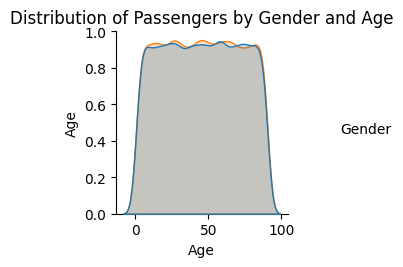

In [23]:
#Task 1: Analyze the distribution of passengers by gender and age

#For this task, a pair plot (scatterplot matrix) can be a good visualization to explore the relationship between age and gender.
# You can use seaborn's pairplot for this: Create a pair plot for age and gender

sns.pairplot(df, hue='Gender', x_vars='Age', y_vars='Age')
plt.title("Distribution of Passengers by Gender and Age")
plt.show()

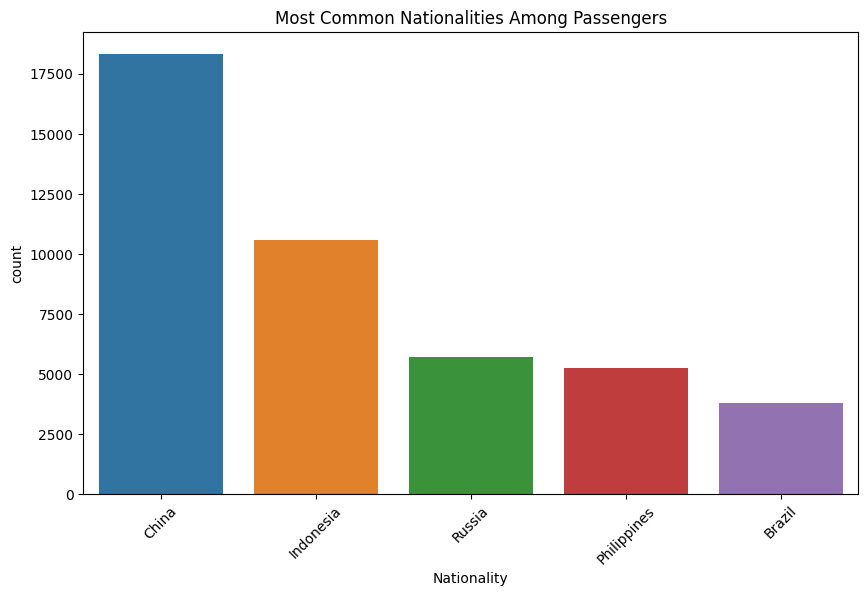

In [24]:
#Task 2: Identify the most common nationalities among passengers

#A bar plot (count plot) is suitable for visualizing the most common nationalities:

# Create a count plot for Nationality
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Nationality', order=df['Nationality'].value_counts().index[:5])
plt.title("Most Common Nationalities Among Passengers")
plt.xticks(rotation=45)
plt.show()

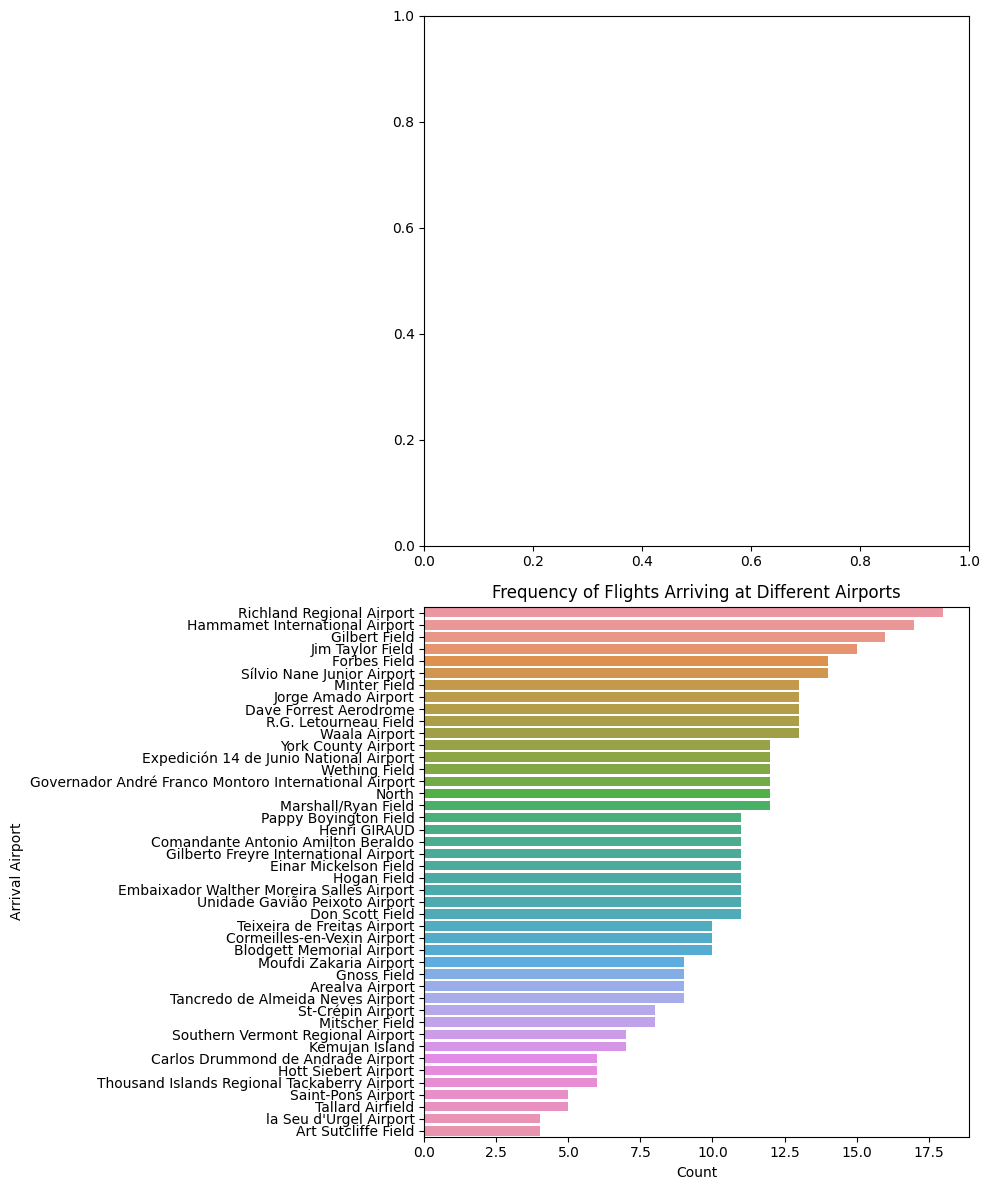

In [36]:
#Task 3: Explore the frequency of flights arriving at different airports

#A bar plot or a count plot can be used to visualize the frequencies of airports:
# Create subplots for Departure Airport and Arrival Airport plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Arrival Airport
sns.countplot(data=df, y='ArrivalAirport', ax=axes[1], order=df['ArrivalAirport'].value_counts().index)
axes[1].set_title("Frequency of Flights Arriving at Different Airports")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Arrival Airport")
axes[1].tick_params(axis='y', labelrotation=0)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


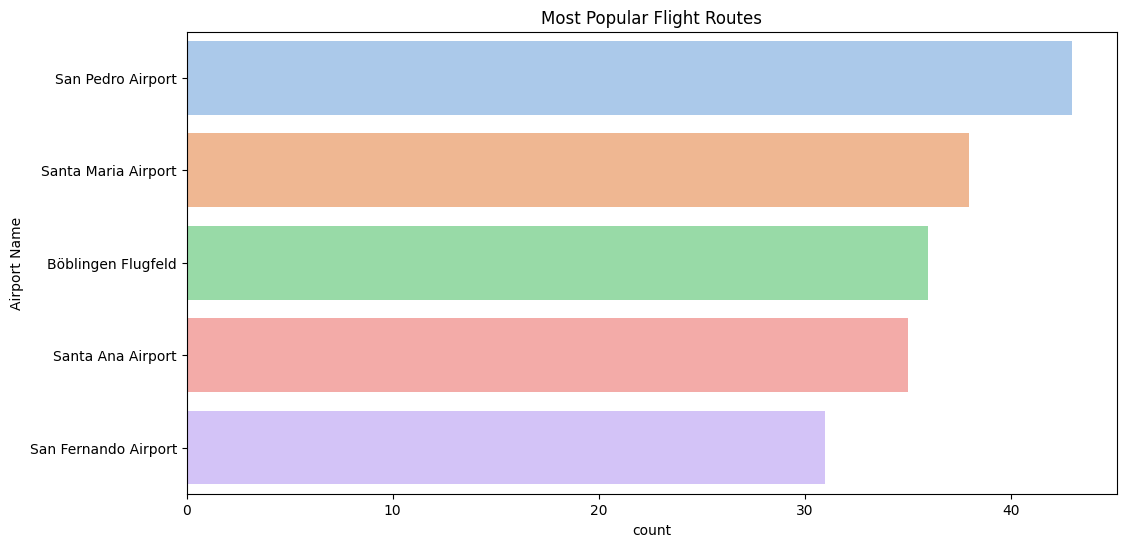

In [28]:
#Task 4: Analyze the most popular flight routes (departure and arrival airports)

#A bar plot can be used to visualize the most popular flight routes:

#python

# Create a count plot for Flight Routes
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Airport Name', order=df['Airport Name'].value_counts().index[:5])
plt.title("Most Popular Flight Routes")
plt.show()



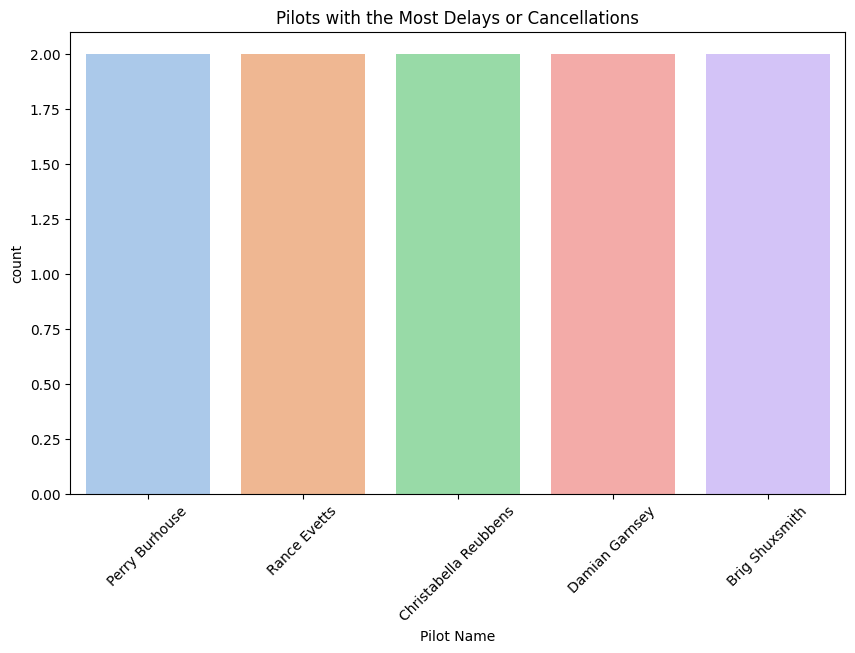

In [29]:
#Task 5: Identify pilots associated with the most delays or cancellations

#A bar plot or count plot can be used to visualize the pilots with the most delays or cancellations:

#python

## Create a count plot for Pilot Names associated with delays or cancellations
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Flight Status'].isin(['Delayed', 'Cancelled'])], x='Pilot Name',
              order=df[df['Flight Status'].isin(['Delayed', 'Cancelled'])]['Pilot Name'].value_counts().index[:5])
plt.title("Pilots with the Most Delays or Cancellations")
plt.xticks(rotation=45)
plt.show()
